In [1]:
import pandas as pd
import scipy as sc
import numpy as np
import h5py
import matplotlib.pylab as plt

ModuleNotFoundError: No module named 'h5py'

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Exploracion de la data

In [ ]:
data_train= "/content/train_catvnoncat.h5"
train_dataset = h5py.File(data_train, "r")
 
data_test= "/content/test_catvnoncat.h5"
test_dataset = h5py.File(data_test, "r")


In [ ]:
train_dataset.keys()

<KeysViewHDF5 ['list_classes', 'train_set_x', 'train_set_y']>

In [ ]:
# Read the data
xtrain_classes, xtrain, train_label =\
train_dataset["list_classes"],train_dataset["train_set_x"],train_dataset["train_set_y"]

test_classes, xtest,test_label =\
test_dataset["list_classes"],test_dataset["test_set_x"],test_dataset["test_set_y"]


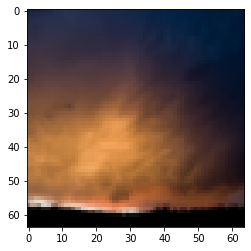

In [ ]:
plt.imshow(xtrain[0])

In [ ]:

xtrain_= np.reshape(xtrain,(209, 64*64*3))/255
xtest_ = np.reshape(xtest,(50, 64*64*3))/255

In [ ]:
np.shape(xtrain_)

(209, 12288)

Construyamos una red neuronal con una capa de entrada, una capa de salida con una red y L-1 redes ocultas.

# Con m datos de entrenamientos.

Para $m$ datos de entrenamiento, las expresión anteriores pueden ser resumidas en las siguientes ecuaciones



\begin{equation}
\begin{bmatrix}
z_1^{(0)}  &z_1^{(1)} & .&.& .&z_1^{(m)}\\
z_2^{(0)}  &z_2^{(1)} &. &.&  .&z_2^{(m)}\\
.          & .        &. & &   &.      \\
.          & .        &  &. &   &.      \\
.          & .        &  &  & .&      \\
z_{n^{[l]}}^{(0)}&z_{n^{[l]}}^{(1)} & . & .& .& z_{n^{[l]}}^{(m)}        \\
\end{bmatrix}^{[l]}=
\begin{bmatrix}
\theta_{11} & \theta_{12} & . & .& .& \theta_{1n^{[l-1]}}\\
\theta_{21} & \theta_{22} & . & .& .& \theta_{2n^{[l-1]}}\\
. & .  & . &   & & .\\
. & .  &   & . & & .\\
. & .  &   &  & .& .\\
\theta_{n^{[l]}1} & \theta_{n^{[l]}2} & . & .& .& \theta_{n^{[l]}n^{[l-1]}}\\
\end{bmatrix}^{[l]}_{n^{[l]} \times n^{[l-1]}}
\begin{bmatrix}
a_1^{(0)}  &a_1^{(1)} & .&.& .&a_1^{(m)}\\
a_2^{(0)}  &a_2^{(1)} &. &.&  .&a_2^{(m)}\\
.          & .        &. & &   &.      \\
.          & .        &  &. &   &.      \\
.          & .        &  &  & .&      \\
a_{n^{[L-1]}}^{(0)}&a_{n^{[L-1]}}^{(1)} & . & .& .& a_{n^{[L-1]}}^{(m)}        \\
\end{bmatrix}^{[l-1]} +
\begin{bmatrix}
b_1 \\
b_2 \\
. \\
. \\
. \\
b_{n^{[l]}}\\
\end{bmatrix}^{[l]} 
\end{equation}


Escrito de una formas mas compacta tenemos que:


\begin{equation}
[ \vec{Z}^{[l](0)},\vec{Z}^{[l](1)},...,\vec{Z}^{[l](m)}  ]= \Theta^{[l]} [\vec{A}^{[l-1](0)},\vec{A}^{[l-1](1)},...,\vec{A}^{[l-1](m)} ]+ \vec{b}^{[l]}
\end{equation}

Aplicando la funcion de activación:

\begin{equation}
[\vec{A}^{[l](0)},\vec{A}^{[l](1)},...,\vec{A}^{[l](m)} ]=f([\vec{Z}^{[l](0)},\vec{Z}^{[l](1)},...,\vec{Z}^{[l](m)}  ]) 
\end{equation}

Las dimensiones de las expresiones anteriores, pueden ser resumidas en lo siguiente:

$\mathrm{dim(\vec{\cal{Z}}^{[l]})}=n^{[l]}\times m $

$\mathrm{dim(\vec{\Theta}^{[l]})}=n^{[l]}\times n^{[l-1]}$

$\mathrm{dim(\vec{\cal{A}}^{[l]})}=n^{[l-1]}\times m $

$\mathrm{dim(\vec{b}^{[l]})}=n^{[l]}$



# Topologia de la red

Topology = [n_x, n_h1, n_h2, n_h3, ...,n_y]


In [ ]:
n_x = 12288# -- size of the input layer
#n_h = # -- size of the hidden layer
n_y = 1# -- size of the output layer


class layer_nn():
  def __init__(self,act_fun, n_layer_present, n_layer_before ):    
    self.W = 2*np.random.random((n_layer_before,n_layer_present)) - 1
    self.B = 2*np.random.random((n_layer_present,1)) - 1
    self.act_fun = act_fun

  def output(self, Z,A, Ap):
    self.Z = Z
    self.A = A
    self.Ap = Ap

  def derivates(self, dW, db):
    self.dW = dW
    self.db = db

def act_function(x, activation):        
    if activation == "sigmoid":
        f = lambda x: 1/(1+np.exp(-x))
        fp = f(x)*(1-f(x))
    elif activation == "tanh":
        f = lambda x: np.tanh
    return f(x), fp
    

In [ ]:
layer = layer_nn("hola, ",1,1)
layer.W

array([[0.18083188]])

In [ ]:
topology = [n_x, 3, 4, 6 ,1]
l1 =  layer_nn("sigmoid", 3, n_x )
l2 =  layer_nn("sigmoid", 4, 3 )
l3 =  layer_nn("sigmoid", 6, 4 )
l4 =  layer_nn("sigmoid", 1, 6 )
nn_red = [l1,l2,l3,l4]

# Generalizar la topologia de la red

In [ ]:
# Forward pass y check dimensiones

In [ ]:
A0 = xtrain_.T

In [ ]:
np.shape(A0)

(12288, 209)

In [ ]:
np.shape(l1.W.T)

(3, 12288)

In [ ]:
# Hyperplanos de salida de la capa 1
Z1 = l1.W.T @ A0 +l1.B
# Funciones sigmoide de la capa 1
A1, A1p = act_function(Z1, "sigmoid")

In [ ]:
np.shape(A1)

(3, 209)

In [ ]:
np.shape(l2.W.T)

(4, 3)

In [ ]:
# Para la capa 2 
Z2 = l2.W.T @ A1 +l2.B
A2, A2p = act_function(Z2, "sigmoid")

In [ ]:
# Para la capa 3 
Z3 = l3.W.T @ A2 + l3.B
A3, A3p = act_function(Z3, "sigmoid")

In [ ]:
# Para la capa 3 
Z4 = l4.W.T @ A3 + l4.B
A4, A4p = act_function(Z4, "sigmoid")

In [ ]:
A0 = xtrain_.T
A, nn = forward_pass(A0, nn_red)

# Determinación de la Función de coste

$$-\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(a^{[L] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right)) \tag{7}$$


# Backward Propagation

Para una capa $l$ arbitraria tenemos que:

- \begin{equation}
d\Theta^{[l]} =  d{\cal Z}^{(i)[l]} A^{(i)[l-1]} = dA^{(i)[l]} f'({\cal Z}^{(i)[l]} ) A^{(i)[l-1]}
\end{equation}

- \begin{equation}
db^{[l]} =  d{\cal Z}^{(i)[L]}  = dA^{(i)[l]} f'({\cal Z}^{(i)[l]} ) 
\end{equation}


Los valores de dA pueden ser escritos como:
- \begin{equation}
dA^{(i)[l-1]} = \Theta^{l} dZ^{(i)[l]}
\end{equation}





 $dZ^{[l]} = dA^{[l]} * f'^{[l]} (Z^{[l]}) $


$ d\Theta^{[l]} = \frac{\partial \mathcal{J} }{\partial \Theta^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T} \tag{1}$
$ db^{[l]} = \frac{\partial \mathcal{J} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)}\tag{2}$
$ dA^{[l-1]} = \frac{\partial \mathcal{L} }{\partial A^{[l-1]}} = \theta^{[l] T} dZ^{[l]} \tag{3}$


In [ ]:
#def backward_propagation(AL,Y, nn):
# Capa L-esima
dAL = -(np.divide(Y, A) - np.divide(1 - Y, 1 - A))
fp = nn[3].Ap
dZ = dAL*fp
m_ = 1/209

dW_L = m_*dZ@nn[2].Ap.T
db_L =  m_*np.sum(dZ, axis=1, keepdims=True)

nn[3].dW=dW_L
nn[3].db=db_L

In [ ]:
# Capa L-1
dAL_1 = dAL 
fp = nn[2].Ap
dZ_1 = dAL_1*fp
dW_L1 = m_*dZ_1@nn[1].Ap.T
db_L1 = dZ_1.mean()

nn[2].dW=dW_L1
nn[2].db=db_L1

In [ ]:
# Capa L-2
dAL_2 = dAL_1 
fp = nn[1].Ap
dZ_2 = dAL_2*fp
dW_L2 = m_*dZ_2@nn[0].Ap.T
db_L2 = dZ_2.mean()

nn[1].dW=dW_L2
nn[1].db=db_L2

In [ ]:
print(np.shape(nn[1].dW))
print(np.shape(nn[1].W))

(4, 3)
(3, 4)


# Aplicacion gradiente descendente

$$ W^{[l]} = W^{[l]} - \alpha \text{ } dW^{[l]} \tag{16}$$
$$ b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]} \tag{17}$$


In [ ]:
def update_params(nn, learning_rate):  
  L=len(nn)
  for l in range(1, L):
    
    nn[l].W = nn[l].W - learning_rate*nn[l].dW.T  
    nn[l].B = nn[l].B - learning_rate*nn[l].db
  return nn

In [ ]:
learning_rate=0.1
nn = backward_propagation(A, Y,nn)
nn = update_params(nn, learning_rate)  
A, nn = forward_pass(A0, nn)
J = cost_Function(A, np.array(train_label))
